Ponieważ nie wszystkie dane sie pobraly dla danych wartosci zooma musimy dokonac filtrowania

In [14]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import sys
sys.path.append('../')

import math
from typing import Any, Dict, List, Optional

import rasterio
import contextily
import geopandas
import haversine as hs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from tqdm.notebook import tqdm

from huhuha.settings import RAW_DATA_DIR, DATA_DIR
from huhuha.centered_tiles import get_otm_center_tile
from huhuha.utils import get_elevation, random_float
from glob import glob

tqdm.pandas()
sns.set_theme(style='whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_csv(DATA_DIR / 'avalanches-dataset.csv', index_col=None)

In [29]:
list_of_12 = glob(f"{DATA_DIR}/center_tiles/avalanches/opentopomap/12/*.png")
list_of_13 = glob(f"{DATA_DIR}/center_tiles/avalanches/opentopomap/13/*.png")
list_of_14 = glob(f"{DATA_DIR}/center_tiles/avalanches/opentopomap/14/*.png")
list_of_15 = glob(f"{DATA_DIR}/center_tiles/avalanches/opentopomap/15/*.png")

In [30]:
list_of_12 = [x.split('/')[-1].split('.')[0] for x in list_of_12]
list_of_13 = [x.split('/')[-1].split('.')[0] for x in list_of_13]
list_of_14 = [x.split('/')[-1].split('.')[0] for x in list_of_14]
list_of_15 = [x.split('/')[-1].split('.')[0] for x in list_of_15]

In [39]:
common = set(list_of_12).intersection(list_of_13).intersection(list_of_14).intersection(list_of_15)

In [31]:
df_12 = df[df['id'].isin(list_of_12)]
df_13 = df[df['id'].isin(list_of_13)]
df_14 = df[df['id'].isin(list_of_14)]
df_15 = df[df['id'].isin(list_of_15)]

In [40]:
df_common = df[df['id'].isin(common)]

In [34]:
df_12.to_csv(DATA_DIR / 'avalanches-dataset-12.csv', index=False)
df_13.to_csv(DATA_DIR / 'avalanches-dataset-13.csv', index=False)
df_14.to_csv(DATA_DIR / 'avalanches-dataset-14.csv', index=False)
df_15.to_csv(DATA_DIR / 'avalanches-dataset-15.csv', index=False)

In [41]:
df_common.to_csv(DATA_DIR / 'avalanches-dataset-common.csv', index=False)

<AxesSubplot:title={'center':'Avalanches count'}>

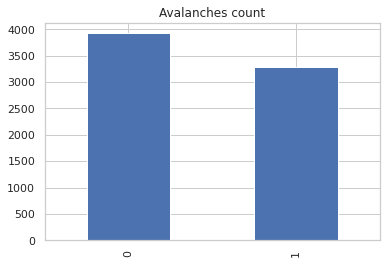

In [35]:
df_12['Avalanche'].value_counts().plot(kind='bar', title='Avalanches count')

<AxesSubplot:title={'center':'Avalanches count'}>

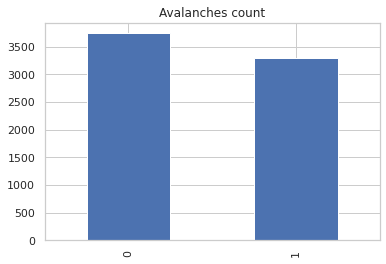

In [36]:
df_13['Avalanche'].value_counts().plot(kind='bar', title='Avalanches count')

<AxesSubplot:title={'center':'Avalanches count'}>

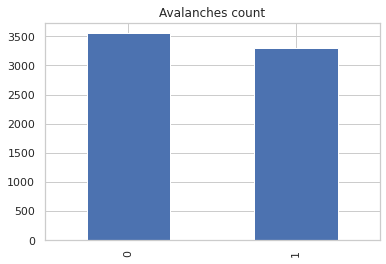

In [37]:
df_14['Avalanche'].value_counts().plot(kind='bar', title='Avalanches count')

<AxesSubplot:title={'center':'Avalanches count'}>

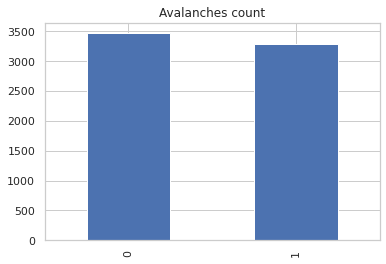

In [38]:
df_15['Avalanche'].value_counts().plot(kind='bar', title='Avalanches count')

<AxesSubplot:title={'center':'Avalanches count'}>

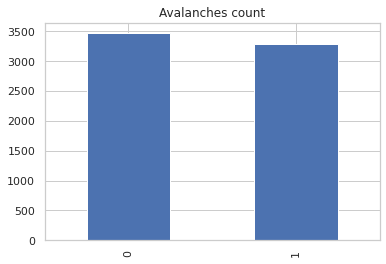

In [42]:
df_common['Avalanche'].value_counts().plot(kind='bar', title='Avalanches count')